In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import zarr
import numpy as np
import ngff_transformations.transform as ngt

from pathlib import Path
from ome_zarr_models._v06.image import Image
from ome_zarr_models._v06.collection import Collection
from ngff_transformations.graph import transform_graph_to_networkx, draw_graph

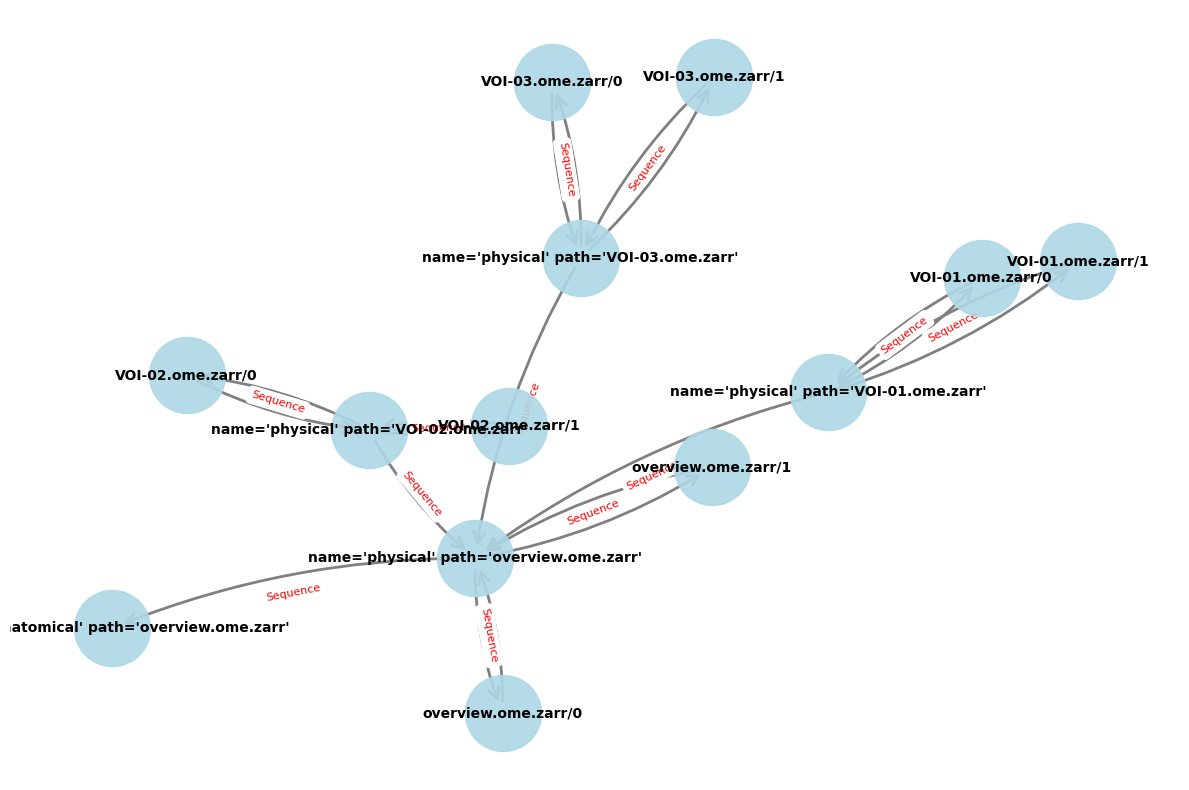

In [3]:
zarr_path = '../data/ngff-rfc5-coordinate-transformation-examples/user_stories/human_organ_atlas.zarr'
group = Collection.from_zarr(zarr.open_group(zarr_path, mode="r"))
graph = group.transform_graph()
nx_graph = transform_graph_to_networkx(graph)
draw_graph(nx_graph)

In [4]:
transformation_path, (src_coord_system, tgt_coord_system), (path_edges, path_nodes) = ngt.find_walks_in_graph(nx_graph, 'VOI-01.ome.zarr/1', None, 'overview.ome.zarr', 'anatomical')

In [5]:
transformation_path

Sequence(type='sequence', input='VOI-01.ome.zarr/1', output=CoordinateSystemIdentifier(name='anatomical', path='overview.ome.zarr'), name=None, transformations=(Sequence(type='sequence', input='1', output='physical', name=None, transformations=(Scale(type='scale', input=None, output=None, name=None, scale=(8.52, 8.52, 8.52), path=None), Translation(type='translation', input=None, output=None, name=None, translation=(4.26, 4.26, 4.26), path=None))), Sequence(type='sequence', input=CoordinateSystemIdentifier(name='physical', path='VOI-01.ome.zarr'), output=CoordinateSystemIdentifier(name='physical', path='overview.ome.zarr'), name='VOI-01 registration', transformations=(Scale(type='scale', input=None, output=None, name=None, scale=(1.0, 1.0, 1.0), path=None), Rotation(type='rotation', input=None, output=None, name=None, rotation=((0.0, 0.0, 1.0), (0.0, 1.0, 0.0), (0.0, 0.0, 1.0)), path=None), Translation(type='translation', input=None, output=None, name=None, translation=(0.0, 0.0, 0.0),

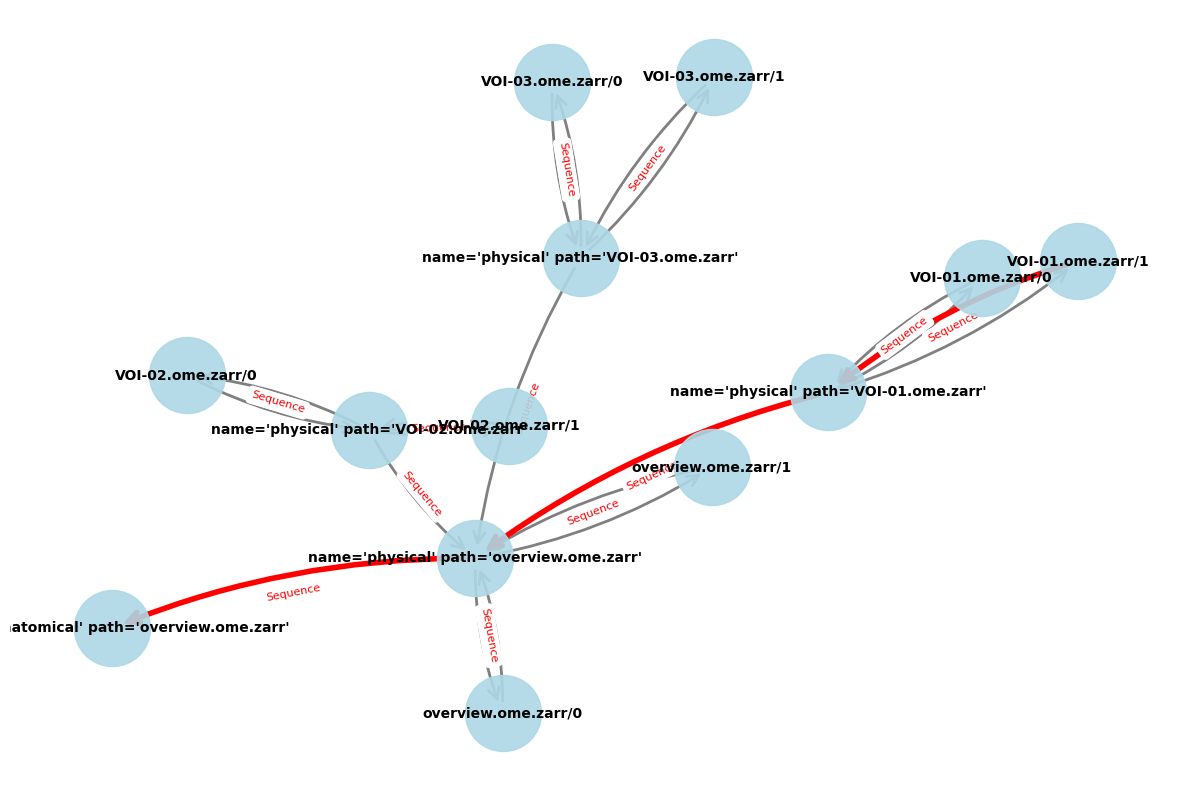

In [6]:
draw_graph(nx_graph, path=path_edges)

In [7]:
data = np.ones((30, 40, 50, 3), dtype=np.uint8)

In [ ]:
transformed_data = ngt.transform_with_sequence3D(data, ['y', 'x', 'z', 'c'], transformation_path, ['y', 'x', 'z', 'c'])

In [ ]:
transformed_data